## Course: Data Minning
## Teacher: Ast.Safi
## Project: Black Friday sales-analysis
### Project memebers: 
##### 1- Mohammad Azim Sakhizadah
##### 2- Mohammad Hussain Ahmadi
##### 3- Sakina Ahmadi

* First of all we will try to know about the data set and details of data set.
* Data cleaning
* Data analysis
* whic group mean or women made more transactios?
* Customer average spend?
* Which product category has been sold the maximum?
* Total Sales made City?
* Plot Most purchased category of product
* Married or Individuals, who spends more?

In [112]:
#import all the necessary packages
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
import pandas as pd
import numpy as np
import seaborn as sns
import math
from scipy import stats as st
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
%matplotlib inline

In [113]:
#load the dataset
df = pd.read_csv("BlackFriday.csv")

# get insight to the dataset

In [114]:
df.shape

(537577, 12)

In [115]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [116]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [118]:
data = pd.read_csv("BlackFriday.csv")
df = pd.DataFrame(data)

print("\nThe first 10 entries in the dataset. There is missing data in Product_Category_2"
     " and Product_Category_3 columns. The purchase column is the amount spent in USD.")
df.head(10)


The first 10 entries in the dataset. There is missing data in Product_Category_2 and Product_Category_3 columns. The purchase column is the amount spent in USD.


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [119]:
#view last few records
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [120]:
#Look at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


# Data cleaning

# finding the missing values

In [121]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [122]:
data=pd.read_csv('BlackFriday.csv')
data= pd.DataFrame(data=data)
total_miss = data.isnull().sum()
perc_miss = total_miss/data.isnull().count()*100

missing_data = pd.DataFrame({'Total missing':total_miss,
                            '% missing':perc_miss})

missing_data.sort_values(by='Total missing',
                         ascending=False).head()

,Total missing,% missing
Product_Category_3,373299,69.441029
Product_Category_2,166986,31.062713
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000


# how to solve missing value problem?
### 1- ignore 
### 2- drop the missing values
### 2- Fill null values  (manully, automatically)

In [123]:
df_copy = df.copy()
print ("Shape of Original df:{}".format(df.shape))
print ("Shape of Copy df_copy:{}".format(df_copy.shape))

Shape of Original df:(537577, 12)
Shape of Copy df_copy:(537577, 12)


#### drop the nall value

In [131]:
# df_copy.dropna(inplace=True)

In [132]:
# print ("Shape of Original df:{}".format(df.shape))
# print ("Shape of Copy df_copy:{}".format(df_copy.shape))

In [133]:
# print ("Propotion of missing values in df :{0:.2f}".format((df.shape[0] - df_copy.shape[0])/df.shape[0]))

# Fill null values

In [134]:
df = df.fillna(0)
print("Missing values have been repalced with 0")
df.head(10)

Missing values have been repalced with 0


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,0.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,0.0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871


# Removing the NaN values is resulting in loss of 70% data in the data set

# Data Analysis
### which group mean or women made more transactios?

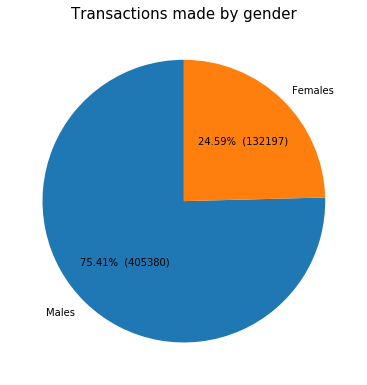

The pie chart shows that the majority of transcations were made by males.


In [135]:
males = df.Gender.str.count("M").sum()
females = df.Gender.str.count("F").sum()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.rcParams["figure.figsize"] = [8, 6.5]
plt.pie([males, females], labels = ["Males", "Females"], shadow = False, startangle = 90,
        autopct = make_autopct([males, females]))

plt.title("Transactions made by gender", fontsize = 15)
plt.show()
print("The pie chart shows that the majority of transcations were made by males.")

# money spent on puchaseses by age

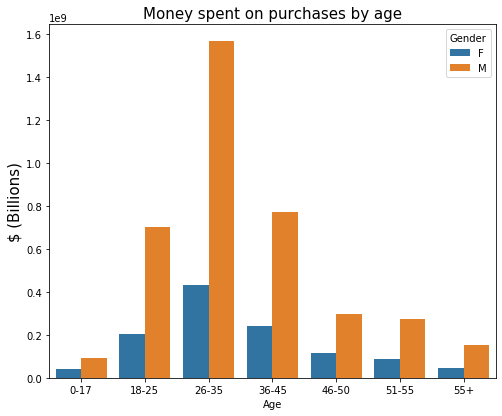

 Males spend the most, and the highest spending age range is 26-35.


In [136]:
df2 = df.loc[:,("Age","Gender", "Purchase")]
df2 = df2.groupby(["Age", "Gender"]).sum().reset_index()
sns.barplot(x="Age", y="Purchase", hue="Gender", data = df2)
plt.ylabel("$ (Billions)", fontsize = 15)
plt.title("Money spent on purchases by age", fontsize = 15)
plt.show()
print(" Males spend the most, and the highest spending age range is 26-35.")

# Customer average spend?

In [137]:
df3 = df
money_spent = df3.Purchase.sum()
purchases = df3.Purchase.count()
average_value = (money_spent / purchases)
print("Customers on average spend $%d each." % average_value)

Customers on average spend $9333 each.


# Total Sales made City?

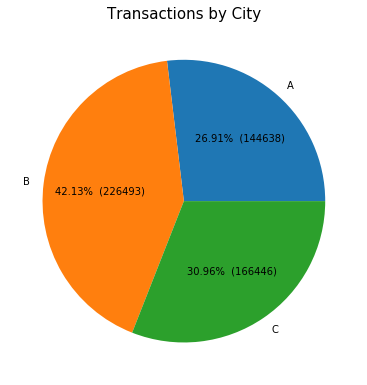

The data shows that the most transactions occur in City B.


In [138]:
city = df3.City_Category
city = city.groupby(city).count()
plt.pie(city, labels = ["A", "B" ,"C"], autopct = make_autopct(city))
plt.title("Transactions by City", fontsize = 15)
plt.show()
print("The data shows that the most transactions occur in City B.")

# Which product category has been sold the maximum?

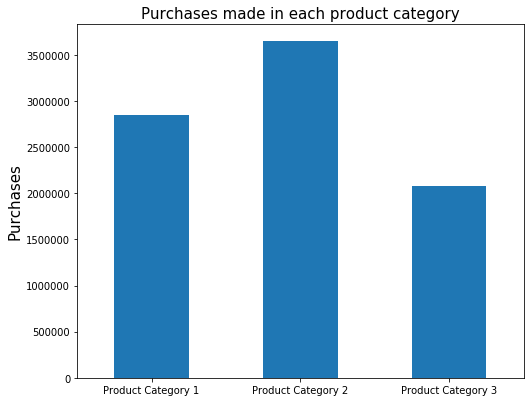

Product category 2 has the most purchases.


In [139]:
products = df.loc[:,("Product_Category_1","Product_Category_2","Product_Category_3")]
labels = ["Product Category 1", "Product Category 2", "Product Category 3"]
products.sum().plot(kind="bar").set_xticklabels(labels, rotation=0)
plt.ylabel("Purchases", fontsize = 15)
plt.title("Purchases made in each product category", fontsize = 15)
plt.show()
print("Product category 2 has the most purchases.")

# Plot Most purchased category of product

[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]
[3, 1, 12, 8, 5, 4, 2, 6, 14, 11, 13, 15, 7, 16, 18, 10, 17, 9] [19849, 138353, 3875, 112132, 148592, 11567, 23499, 20164, 1500, 23960, 5440, 6203, 3668, 9697, 3075, 5032, 567, 404]


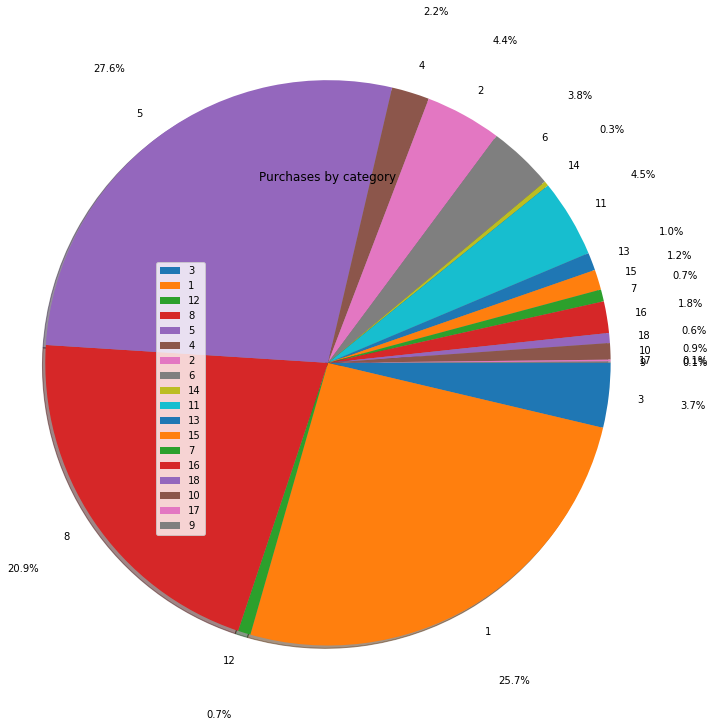

In [140]:
unique_Product_Cat_1 = df.Product_Category_1.unique()
print(unique_Product_Cat_1)
list_product_cat_1 = []
list_product_count = []
for prod in unique_Product_Cat_1:
    prodname = prod
    count = df[df['Product_Category_1'] == prodname].count()
    list_product_cat_1.append(prodname)
    list_product_count.append(count.Product_Category_1)
    
print(list_product_cat_1,list_product_count)
    
#explode = (0.2, 0)
plt.pie(list_product_count, labels= list_product_cat_1,autopct='%1.1f%%',radius=2,pctdistance=1.3,labeldistance=1.1,counterclock=False, shadow=True)
plt.title('Purchases by category')
plt.legend(list_product_cat_1,loc=3)
plt.show()

# Married or Individuals, who spends more?

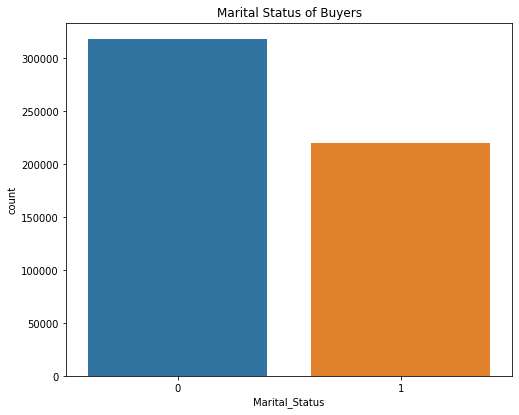

In [141]:
def count_plot(dataframe, column_name, title =None, hue = None):
    sns.countplot(data = dataframe, x = column_name, hue=hue)
    plt.title(title)

count_plot(df,"Marital_Status","Marital Status of Buyers")

In [ ]:
df["Age"] = df["Age"].astype("category").cat.codes
df["Gender"] = df["Gender"].astype("category").cat.codes
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype("category").cat.codes
sns.heatmap(df.corr(), annot=True, fmt="f")
plt.show()
print("The heatmap shows how one variable can affect the change in another variable. " 
      "Darker colours show less of a correlation between two variables whereas lighter "
      "colours show the opposite.\n\nA few observations: People who purchase items in product category 1 "
      "are less likely to purchase an item from product category 3. Product category 1 also "
      "has less of an impact on the total expenditure, whereas product category 3 has a greater "
      "impact on this. Gender, age, occupation and marital status have very little effect on the "
      "money spent on a purchase.")


In [ ]:
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

## Summary of Exploratory Data Analysis

The data suggests that the most money spent on Black Friday comes from unmarried males in the age range of 26-35. The customer is most likely to have work in occupation 4. The most transactions occur in city B and the people who make these transactions are more likely to have stayed in their city for at least 1 year.  

## Predicting Money Spent on Purchases (multivariable linear regression)

In [110]:
#linear regression with multiple variables equation:
#y = (m_1 * x_1) + (m_2 * x_2) + (m_3 * x_3) +b
#where y is purchase and x_1, x_2 and x_3 are products category 1,2 and 3 respectively
#m_1, m_2 and m_3 are coefficients and b is the intercept

#splitting the dataframe to create a training and testing data set
predict = df.loc[:,("Product_Category_1","Product_Category_2","Product_Category_3", "Purchase")]
train, test = train_test_split(predict, test_size=0.3)

#training the model
reg = linear_model.LinearRegression()
reg.fit(train[["Product_Category_1","Product_Category_2","Product_Category_3"]], train.Purchase)
[m_1,m_2,m_3] = reg.coef_
b = reg.intercept_
r_sq = reg.score(train[["Product_Category_1","Product_Category_2","Product_Category_3"]], train.Purchase)
print("The model for this multivariable linear regression is: "
      "y = (%.3f * x_1) + (%.3f * x_2) + (%.3f * x_3) + %.3f \n" % (m_1, m_2, m_3, b))

#using test data onthe model
output = ((m_1 * test.Product_Category_1) + (m_2 * test.Product_Category_2) + (m_3 * test.Product_Category_3) + b)
Predicted_Purchase = output.to_frame()
df_Predict = test.join(Predicted_Purchase)
df_Predict.columns = ["Product_Category_1", "Product_Category_2", "Product_Category_3", "Purchase", "Predicted_Purchase"]
print("The predicted purchase values have now been added to the dataframe for comparison.\n")
df_Predict.head(10)
print("The R squared value is %.2f." % r_sq )

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [111]:
MAE = metrics.mean_absolute_error(df_Predict.Purchase, df_Predict.Predicted_Purchase)
print("%.2f is the mean absolute error. It measures the average variation "
      "in the predicted value compared to the expected value. This result suggests that there is, "
      "on average a difference of %.2f between the predicted and expected value. "
      "The closer this value is to 0, the less errors there are in a model\n" % (MAE, MAE))

RMSE = math.sqrt(metrics.mean_squared_error(df_Predict.Purchase, df_Predict.Predicted_Purchase))
print("%.2f is the root mean squared error.\n " % RMSE)
print("The results from the mean absolute error and root mean squared error show that this model is not very accurate.")

NameError: name 'df_Predict' is not defined